In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('sar_1 (1).jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

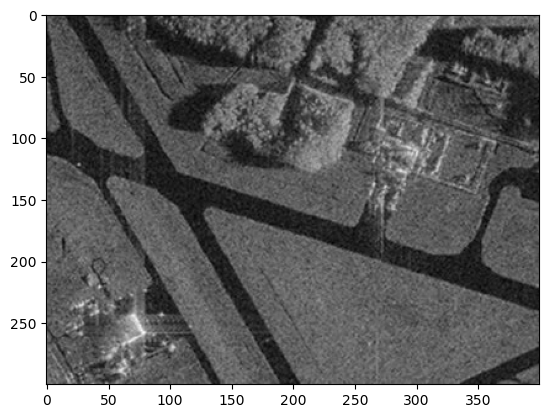

In [3]:
plt.imshow(image_gray, cmap="gray")

In [4]:
import math
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])
                                                            
    if abs(av_val - img[point]) <= T:
        return True
    
    return False

In [5]:
def region_growing(image, seed_point,homo_fun,r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r,image.shape[0] - r):
            for j in range(r,image.shape[1] - r):
                if mask[i,j]==0 and mask[i - r:i + r, j-r: j+r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        print(count)
        mask += local_mask
        
    return mask*255

In [6]:
seed_point = (250,250)
r = 4
T = 16
mask = region_growing(image_gray,seed_point,homo_average,r, T)

56
151
242
331
415
524
613
700
788
868
974
810
777
829
879
767
753
719
676
659
651
609
562
538
497
459
450
411
373
352
305
516
290
255
224
206
106
67
47
27
10
0


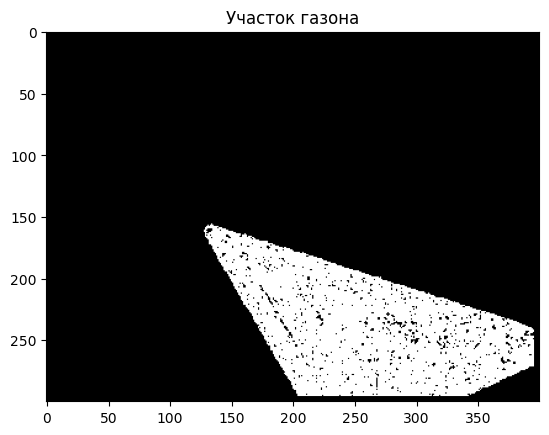

In [7]:
plt.imshow(mask, cmap = "gray")
plt.title("Участок газона")
plt.show()

In [8]:
flags = cv2.KMEANS_RANDOM_CENTERS
z = image_gray.reshape((-1,3))
z = np.float32(z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_gray.shape))

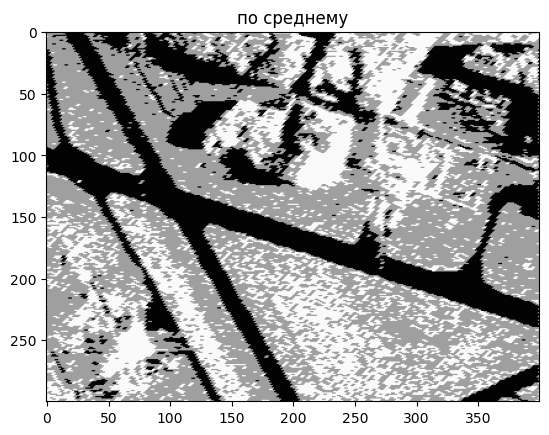

In [9]:
plt.imshow(res2, cmap="gray")
plt.title("по среднему")
plt.show()

In [10]:
def calculate_intracluster_distance(labels, centers, data):
    total_distance = 0
    for i in range(len(centers)):
        cluster_points = data[labels.flatten() == i]
        if len(cluster_points) > 0:
          distances = np.linalg.norm(cluster_points - centers[i], axis=1)
          total_distance += np.sum(distances)
    return total_distance

In [11]:
z = image_gray.reshape((-1, 1))
z = np.float32(z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret, label, center = cv2.kmeans(z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_gray.shape))

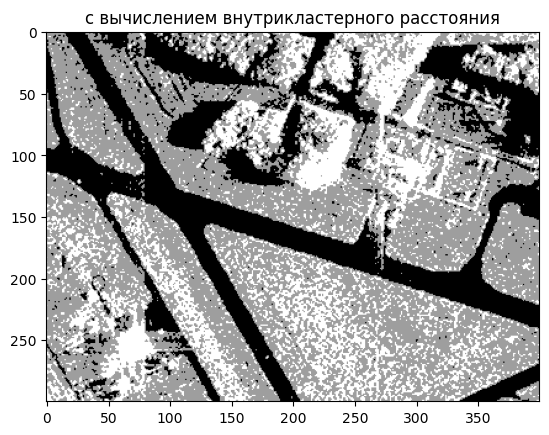

In [12]:
plt.imshow(res2, cmap="gray")
plt.title("с вычислением внутрикластерного расстояния")
plt.show()

In [13]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 15, 1.0)
K = 4
ret, label, center = cv2.kmeans(z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image_gray.shape))

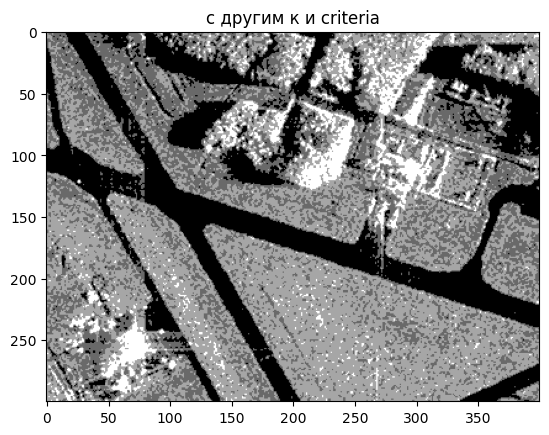

In [14]:
plt.imshow(res2, cmap="gray")
plt.title("с другим к и criteria")
plt.show()

In [15]:
from scipy import ndimage
image = cv2.imread("palm_1 (1).JPG")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [16]:
blurred = cv2.GaussianBlur(image_gray, (13, 13), 0)
ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
local_maxima = ndimage.maximum_filter(dist_transform, size=20, mode='constant')
ret, sure_fg = cv2.threshold(dist_transform, 0.1 * dist_transform.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg)
markers[dist_transform == local_maxima] = 1
markers = ndimage.label(markers)[0]
markers = cv2.watershed(image, markers.astype(np.int32))
num_trees = len(np.unique(markers)) - 1
segmented_image = image.copy()
segmented_image[markers == -1] = [255, 0, 0]

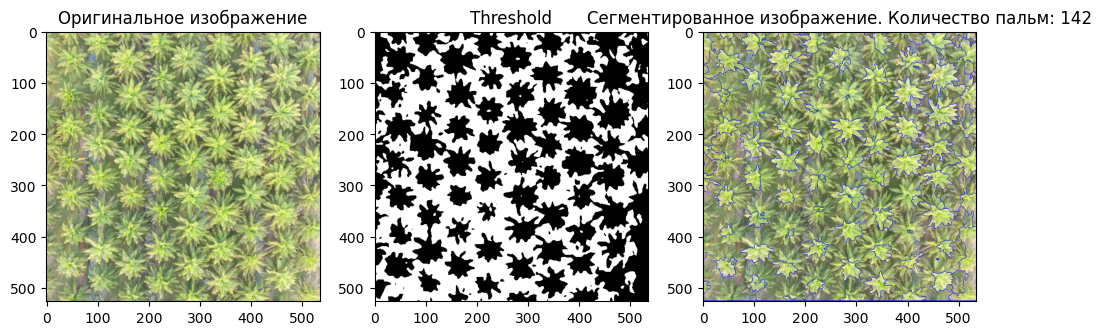

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Оригинальное изображение")
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.title("Threshold")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title(f"Сегментированное изображение. Количество пальм: {num_trees}")
plt.show()